## Exploratory Data Analysis (EDA) of Genome Data

This notebook provides an extensive exploratory data analysis of genome data, including summary statistics and visualizations.

The Genome Data follows General GFF3 structure. All GFF formats (GFF2, GFF3 and GTF) are tab delimited with 9 fields per line. They all share the same structure for the first 7 fields, while differing in the content and format of the ninth field. Some field names have been changed in GFF3 to avoid confusion. For example, the "seqid" field was formerly referred to as "sequence", which may be confused with a nucleotide or amino acid chain. 
Find more details: https://en.wikipedia.org/wiki/General_feature_format 

The data represent detailed information about genomic features, including their positions, types, and corresponding sequences. It could be used for various bioinformatics analyses, such as gene expression studies, genetic variant detection, or functional annotation. Here's a breakdown of the columns and what they represent in provided dataset:

- **SeqName:** The sequence name or identifier, likely referring to a specific genome or chromosomal segment.
- **Source:** The source of the annotation, possibly indicating the database or tool used to generate this data.
- **Feature:** The type of genomic feature, such as transcripts, exons, codons, etc.
- **Start:** The start position of the feature within the sequence.
- **End:** The end position of the feature within the sequence.
- **Score:** This column contains a "." for the first few rows, so its purpose is not immediately clear. It might represent a confidence score or other metric.
- **Strand:** The DNA strand direction, either "+" (forward) or "-" (reverse).
- **Frame:** The reading frame of the codon, an important concept in gene translation. It can be 0, 1, or 2.
- **Attribute:** Additional attributes or annotations related to the feature, such as gene IDs, transcript IDs, exon numbers, etc.
- **Genome String:** The actual nucleotide sequence (A, T, C, G) corresponding to the feature. It appears to be broken into multiple lines in some cases.

In [1]:

# Importing the necessary libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
    

### Reading the Data

In [2]:

# Reading the CSV file
genome_data = pd.read_csv('GenomeCleanData.csv')
genome_data.head()
    

,SeqName,Source,Feature,Start,End,Score,Strand,Frame,Attribute,Genome String
0,NC_045512v2,ncbiGenes.genePred,transcript,266,13483,.,+,.,"gene_id ""ORF1a""; transcript_id ""ORF1a"";",TAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAAC\nACACG...
1,NC_045512v2,ncbiGenes.genePred,exon,266,13483,.,+,.,"gene_id ""ORF1a""; transcript_id ""ORF1a""; exon_n...",TAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAAC\nACACG...
2,NC_045512v2,ncbiGenes.genePred,CDS,266,13480,.,+,0,"gene_id ""ORF1a""; transcript_id ""ORF1a""; exon_n...",TAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAAC\nACACG...
3,NC_045512v2,ncbiGenes.genePred,start_codon,266,268,.,+,0,"gene_id ""ORF1a""; transcript_id ""ORF1a""; exon_n...",TA
4,NC_045512v2,ncbiGenes.genePred,stop_codon,13481,13483,.,+,0,"gene_id ""ORF1a""; transcript_id ""ORF1a""; exon_n...",AA


### Summary Statistics

#### Features Distribution

In [3]:

# Distribution of genomic features
feature_distribution = genome_data['Feature'].value_counts()
feature_distribution
    

exon           13
CDS            13
transcript     12
start_codon    12
stop_codon     12
Name: Feature, dtype: int64

#### Strand Distribution

In [10]:
# Distribution of strand direction
strand_distribution = genome_data['Strand'].value_counts()
strand_distribution

+    62
Name: Strand, dtype: int64

It appears that all the genomic features in the dataset are on the positive ("+") strand direction.

#### Start Positions Summary
We can analyze the start and end positions of the genomic features to understand their range and distribution.

In [5]:

# Summary statistics of the start positions
start_positions_summary = genome_data['Start'].describe()
start_positions_summary
    

count       62.000000
mean     22758.903226
std       9384.328067
min        266.000000
25%      22517.750000
50%      26856.000000
75%      27853.000000
max      29672.000000
Name: Start, dtype: float64

#### End Positions Summary

In [6]:

# Summary statistics of the end positions (correcting the column name)
end_positions_summary = genome_data['End '].describe()
end_positions_summary
    

count       62.000000
mean     24814.096774
std       6366.090665
min        268.000000
25%      25384.000000
50%      27191.000000
75%      27887.000000
max      29674.000000
Name: End , dtype: float64

### Visualizations

#### Feature Distribution Plot

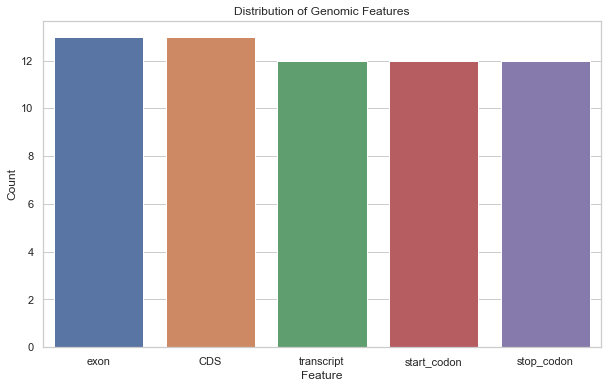

In [7]:

# Feature Distribution Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=genome_data, x='Feature', order=genome_data['Feature'].value_counts().index)
plt.title('Distribution of Genomic Features')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()
    

The bar plot above displays the distribution of genomic features in the dataset. As observed earlier, the features "exon" and "CDS" have the highest occurrences, followed by "transcript," "start_codon," and "stop_codon."

#### Start and End Positions Distribution Plot

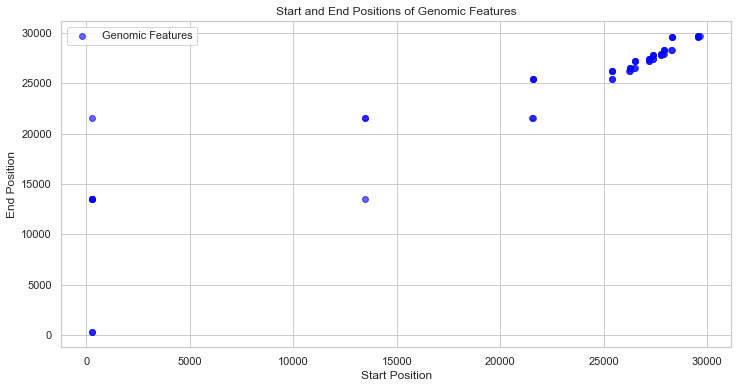

In [8]:

# Start and End Positions Distribution Plot
plt.figure(figsize=(12, 6))
plt.scatter(genome_data['Start'], genome_data['End '], c='blue', alpha=0.6, label='Genomic Features')
plt.title('Start and End Positions of Genomic Features')
plt.xlabel('Start Position')
plt.ylabel('End Position')
plt.legend()
plt.show()
    

The scatter plot above shows the start and end positions of the genomic features. You can observe the relationship between the start and end positions, as well as identify any clusters or patterns in the distribution of these features.

#### Histogram for 'End' Positions

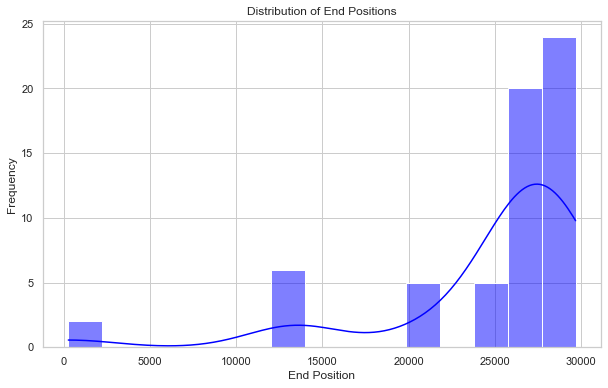

In [9]:

# Histogram for 'End' positions
plt.figure(figsize=(10, 6))
sns.histplot(genome_data['End '], bins=15, kde=True, color='blue')
plt.title('Distribution of End Positions')
plt.xlabel('End Position')
plt.ylabel('Frequency')
plt.show()
    

The histogram above displays the distribution of end positions for the genomic features. The kernel density estimate (KDE) line provides a smooth approximation of the distribution.

### Gene length analysis 
Gene length analysis allows us to study the distribution of lengths for various genomic features such as genes, transcripts, exons, etc. In this dataset, we can calculate the lengths of features like exons and transcripts by taking the difference between the start and end positions.

Let's begin by calculating the lengths for different features and summarizing the results.

In [11]:

# Calculating the lengths of genomic features by subtracting the start position from the end position
genome_data['Length'] = genome_data['End '] - genome_data['Start'] + 1

# Displaying the first few rows with the newly calculated 'Length' column
genome_data_with_length = genome_data[['SeqName', 'Feature', 'Start', 'End ', 'Length']]
genome_data_with_length.head()


,SeqName,Feature,Start,End,Length
0,NC_045512v2,transcript,266,13483,13218
1,NC_045512v2,exon,266,13483,13218
2,NC_045512v2,CDS,266,13480,13215
3,NC_045512v2,start_codon,266,268,3
4,NC_045512v2,stop_codon,13481,13483,3


The "Length" column has been added to the dataset, representing the length of each genomic feature. This length is calculated as the difference between the end and start positions plus one, to include both the start and end positions in the calculation.

#### Analyzing the Lengths of Specific Features
Now, we can analyze the lengths of specific features such as exons, transcripts, coding sequences (CDS), etc. Let's start by summarizing the lengths for each type of feature.

In [15]:

# Summary statistics for the lengths of exons
exon_lengths_summary = genome_data_with_length[genome_data_with_length['Feature'] == 'exon']['Length'].describe()
exon_lengths_summary


count       13.000000
mean      3267.923077
std       4944.132338
min        117.000000
25%        228.000000
50%        669.000000
75%       3822.000000
max      13218.000000
Name: Length, dtype: float64

These statistics provide insights into the distribution of exon lengths within the dataset.

In [16]:

# Summary statistics for the lengths of transcripts
transcript_lengths_summary = genome_data_with_length[genome_data_with_length['Feature'] == 'transcript']['Length'].describe()
transcript_lengths_summary


count       12.000000
mean      3540.166667
std       6710.238430
min        117.000000
25%        217.500000
50%        517.500000
75%       1900.500000
max      21290.000000
Name: Length, dtype: float64

The transcript lengths vary widely, with the maximum length being significantly larger than the median, indicating a skewed distribution.

### Visualizing the Length Distribution
We can also visualize the length distribution for different features using box plots and histograms.

#### Box Plot for Length Distribution of Exons and Transcripts
The box plot below visualizes the length distribution of exons and transcripts in the dataset. By using a logarithmic scale on the y-axis, we can better visualize the range and distribution of lengths, especially since there are significant differences in the lengths of these features. The plot shows the median, quartiles, and potential outliers for both exons and transcripts.

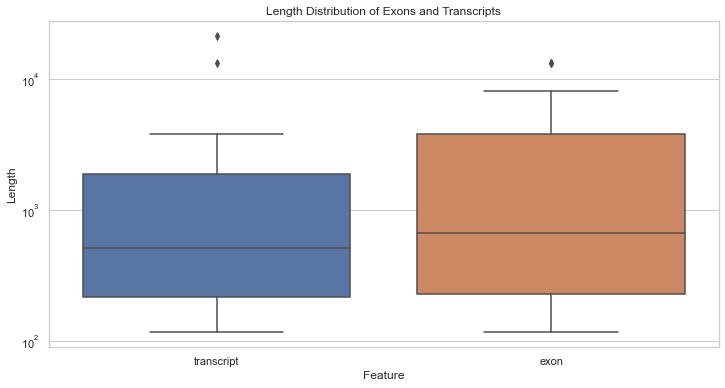

In [14]:

# Box plot for the length distribution of exons and transcripts
plt.figure(figsize=(12, 6))
sns.boxplot(data=genome_data_with_length[genome_data_with_length['Feature'].isin(['exon', 'transcript'])], x='Feature', y='Length')
plt.title('Length Distribution of Exons and Transcripts')
plt.xlabel('Feature')
plt.ylabel('Length')
plt.yscale('log')  # Setting the y-axis to logarithmic scale for better visualization
plt.show()


Conclusion

The gene length analysis provides insights into the distribution and characteristics of the lengths of genomic features such as exons and transcripts. This information can be valuable in understanding gene structure and organization and may have implications in various biological contexts.